In [2]:
import pandas as pd
import networkx as nx
import pygraphviz

file_name = file_name = "release_networks_homework_data/Cooffending/Cooffending.csv"
data = pd.read_csv(file_name)

/Users/martz/.pyenv/versions/3.9.2/envs/mit6.419x/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
data.drop_duplicates().count()

OffenderIdentifier      1279992
OffenderGender          1279992
CrimeIdentifier         1279992
CrimeType1              1278542
CrimeType2               150289
CrimeType3                30034
CrimeType4                 6921
Municipality            1279992
CrimeLocation           1140011
NumberYouthOffenders    1279992
NumberAdultOffenders    1279992
CrimeDate               1279992
CrimeYear               1279992
dtype: int64

In [5]:
#data.loc[:,['OffenderIdentifier', 'CrimeIdentifier']].drop_duplicates()
data = data.drop_duplicates(subset=['OffenderIdentifier', 'CrimeIdentifier'], keep='last')

In [6]:
data.count()

OffenderIdentifier      1279987
OffenderGender          1279987
CrimeIdentifier         1279987
CrimeType1              1278537
CrimeType2               150289
CrimeType3                30034
CrimeType4                 6921
Municipality            1279987
CrimeLocation           1140006
NumberYouthOffenders    1279987
NumberAdultOffenders    1279987
CrimeDate               1279987
CrimeYear               1279987
dtype: int64

In [20]:
len(data.OffenderIdentifier.unique())

539593

In [21]:
len(data.CrimeIdentifier.unique())

1164836

In [53]:
data_crimes = data.groupby(['OffenderIdentifier']).agg(num_crimes=('CrimeIdentifier', 'count'))
data_crimes.sort_values(by=['num_crimes'], ascending=False)

,num_crimes
OffenderIdentifier,
300728,456
440431,358
253577,357
120976,350
373749,275
...,...
286709,1
286708,1
286707,1


In [54]:
from scipy.sparse import csr_matrix
crime_matrix = csr_matrix((vals, (row, col)), shape=(row.max() + 1, col.max() + 1))

NameError: name 'vals' is not defined

In [ ]:
data.groupby(['CrimeYear']).agg(['count'])

In [26]:
data_2008 = data['CrimeYear']==2008
data_2008 = data.loc[data['CrimeYear'] == 2008]
len(data_2008.CrimeIdentifier.unique())

199288

In [37]:
data.groupby(['CrimeIdentifier'])['OffenderIdentifier'].nunique().sort_values(ascending=False)

CrimeIdentifier
27849      156
876159     102
445040      77
23526       60
60815       60
          ... 
512711       1
512712       1
512713       1
512714       1
1639823      1
Name: OffenderIdentifier, Length: 1164836, dtype: int64

In [38]:
data.loc[data['CrimeIdentifier'] == 27849]

,OffenderIdentifier,OffenderGender,CrimeIdentifier,CrimeType1,CrimeType2,CrimeType3,CrimeType4,Municipality,CrimeLocation,NumberYouthOffenders,NumberAdultOffenders,CrimeDate,CrimeYear
43313,47053,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009
48202,51795,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009
52676,56003,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009
55304,58110,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009
58993,61468,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775354,450815,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009
795913,460918,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009
855836,489127,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009
982842,541404,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009


In [ ]:
data.loc[data['CrimeIdentifier'] == 27849]

In [58]:
data['OffenderIdentifierStr']= data['OffenderIdentifier'].apply(str)
data_agg = data.groupby('CrimeIdentifier').OffenderIdentifierStr.agg([('count', 'count'), ('OffenderIdentifierStr', ', '.join)])

<ipython-input-58-790c95fd88c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OffenderIdentifierStr']= data['OffenderIdentifier'].apply(str)


In [59]:
data_agg

,count,OffenderIdentifierStr
CrimeIdentifier,,
303,1,525728
305,1,190771
307,1,518774
308,2,"434570, 518774"
310,2,"268119, 414255"
...,...,...
1634404,1,166967
1634405,1,219524
1639019,1,492848


In [62]:
data_agg.applymap(lambda x: len(str(x)))

,count,OffenderIdentifierStr
CrimeIdentifier,,
303,1,6
305,1,6
307,1,6
308,1,14
310,1,14
...,...,...
1634404,1,6
1634405,1,6
1639019,1,6


In [88]:
def create_list_tuple_edges(offender_str):
    tuple_list = []
    off_list = offender_str.split(",")
    for f1 in range(len(off_list)):
        for f2 in range(f1+1, len(off_list)):
            tuple_list.append((off_list[f1],off_list[f2]))
    return tuple_list
    
data_agg['col1'] = data_agg['OffenderIdentifierStr'].apply(create_list_tuple_edges)

In [73]:

# import pandas library
import pandas as pd
  
# create a Dataframe
# df = pd.DataFrame([[(10, 20), (10, 30), (20,30)]],
#                   [[(10, 50), (10, 60), (50,60)]],
#                   [[(50, 80), (50, 90), (80,90)]],
#                   [[(20, 50)]],
#                  columns=['Col_A'])
d = {'col1': [[(10, 20), (10, 30), (20,30)],
              [(10, 50), (10, 60), (50,60)],
              [(50, 80), (50, 90), (80,90)],
              [(20, 50)]]
    }
# show the dataframe
df = pd.DataFrame(data=d)

In [74]:
df

,col1
0,"[(10, 20), (10, 30), (20, 30)]"
1,"[(10, 50), (10, 60), (50, 60)]"
2,"[(50, 80), (50, 90), (80, 90)]"
3,"[(20, 50)]"


In [96]:
data_agg['col1']
li2 = data_agg['col1'].to_list()
new_li = list(filter(lambda x: len(x) > 0, li2 ))
tot_list = []
for l in new_li:
    tot_list = tot_list + l

In [106]:
data_agg['OffenderIdentifierStr'].to_list()

CrimeIdentifier
303                525728
305                190771
307                518774
308        434570, 518774
310        268119, 414255
                ...      
1634404            166967
1634405            219524
1639019            492848
1639822             76879
1639823            640012
Name: OffenderIdentifierStr, Length: 1164836, dtype: object

In [114]:
solo_li = list(filter(lambda x: "," not in x, data_agg['OffenderIdentifierStr'].to_list()))
setsi = set(solo_li)
tot_tot_list = []
for tup in tot_list:
    tot_tot_list.append(tup[1].strip())
    tot_tot_list.append(tup[0].strip())
       
setti = set(tot_tot_list)

In [120]:
only_solo = setsi - setti
len(only_solo)


418434

In [121]:
418434 + 121159

539593

In [98]:
Gr = nx.Graph()
def add_edges(G, list_tuples):
    for tup in list_tuples:
        if G.has_edge(tup[0].strip(), tup[1].strip()):
            G.add_edge(
                tup[0].strip(), 
                tup[1].strip(), 
                weight=G[tup[0].strip()][tup[1].strip()]['weight']+1
                )    
        else:
            G.add_edge(
                tup[0].strip(), 
                tup[1].strip(), 
                weight=1
                )
    return G

G = add_edges(Gr, tot_list)           

In [104]:
print(len(list(G.nodes)))
print(len(list(G.edges)))

121159
178413


In [ ]:
A = nx.adjacency_matrix(G)

In [126]:
deg = [d for n, d in G.degree()]
sum_d = sum(deg)
sum_d / len(deg)

2.945105192350548

In [128]:
len(list(filter(lambda x: x >= 100, deg)))

265

In [132]:
len(list(nx.connected_components(G)))

36098

In [145]:
con_li = list(nx.connected_components(G))
max_set = 0
for c in con_li:
    max_set = max(len(c), max_set)
max_set
#G.edges
#max(nx.connected_components(G), key=len)

19924

In [149]:
Gr = G.copy()
threshold = 1

# filter out all edges equal to threshold of one
long_edges = list(filter(lambda e: e[2] == threshold, (e for e in Gr.edges.data('weight'))))
le_ids = list(e[:2] for e in long_edges)

# remove filtered edges from graph G
Gr.remove_edges_from(le_ids)
len(list(Gr.edges))
# Gr.remove_nodes_from(list(nx.isolates(Gr)))
# len(list(Gr.nodes))

17764

In [150]:
Gnr = G.copy()
threshold = 1

# filter out all edges equal to threshold of one
long_edges = list(filter(lambda e: e[2] > threshold, (e for e in Gnr.edges.data('weight'))))
nle_ids = list(e[:2] for e in long_edges)

# remove filtered edges from graph G
Gnr.remove_edges_from(nle_ids)
len(list(Gnr.edges))
# Gnr.remove_nodes_from(list(nx.isolates(Gnr)))
# len(list(Gnr.nodes))

113519

In [151]:
print("Gnr:" + str(len(list(Gnr.edges))))
print("Gr:" + str(len(list(Gr.edges))))

Gnr:162965
Gr:15448


In [156]:
print("Gnr:" + str(len(list(nx.connected_components(Gnr)))))
print("Gr:" + str(len(list(nx.connected_components(Gr)))))
cc_gnr = list(nx.connected_components(Gnr))
cc_gr = list(nx.connected_components(Gr))

Gnr:35596
Gr:6463


In [164]:
max_cc_gnr = max(nx.connected_components(Gnr), key=len)
max_cc_gr = max(nx.connected_components(Gr), key = len)
nodes_max_cc_gnr = len(max_cc_gnr) 
nodes_max_cc_gr = len(max_cc_gr)
frac_needed_gnr = nodes_max_cc_gnr / len(list(Gnr.nodes))
frac_needed_gr = nodes_max_cc_gr / len(list(Gr.nodes))
print("frac_needed_gnr: " + str(frac_needed_gnr))
print("frac_needed_gr: " + str(frac_needed_gr))

frac_needed_gnr: 0.10646675886855944
frac_needed_gr: 0.0037153794190497636


In [165]:
Gnr_cc_sub = Gnr.subgraph(max(nx.connected_components(Gnr), key=len)).copy()
Gr_cc_sub = Gr.subgraph(max(nx.connected_components(Gr), key=len)).copy() 
G_cc_sub = Gr.subgraph(max(nx.connected_components(G), key=len)).copy() 
G_cc_sub

In [172]:
G_cc_sub_with_solo = Gcopysolo.subgraph(max(nx.connected_components(Gcopysolo), key=len)).copy() 

In [171]:
Gcopysolo = G.copy()
Gcopysolo.add_nodes_from(only_solo)

In [173]:
print("Gnr_cc_sub: " + str(nx.classes.function.density(Gnr_cc_sub)))
print("Gr_cc_sub: " + str(nx.classes.function.density(Gr_cc_sub)))
print("G_cc_sub: " + str(nx.classes.function.density(G_cc_sub)))
print("G_cc_sub_with_solo: " + str(nx.classes.function.density(G_cc_sub_with_solo)))

Gnr_cc_sub: 0.0007231308979893168
Gr_cc_sub: 0.04568764568764569
G_cc_sub: 0.0003602120755175508
G_cc_sub_with_solo: 0.0003556454848657796


In [157]:
tot_len_cnr = 0 
for cnr in cc_gnr:
    tot_len_cnr += len(cnr)
avg_len_cnr = tot_len_cnr / len(cc_gnr)
avg_len_cnr

3.189094280256209

In [158]:
tot_len_cr = 0 
for cr in cc_gr:
    tot_len_cr += len(cr)
avg_len_cr = tot_len_cr / len(cc_gr)
avg_len_cr

2.7485687761101656

In [77]:
G = nx.Graph()
G.has_edge(0, 1)
# G[1][0]

False

In [84]:
s = set()
def add_to_set(list_tuples):
    s = s.union(set(list_tuples))

def add_edge(list_tuples):
    for tup in list_tuples:
        if G.has_edge(tup[0], tup[1]):
            G.add_edge(tup[0], tup[1], weight = G[tup[0]][tup[1]]['weight']  + 1)
tot_list = []            
li = df['col1'].to_list()

for l in li:
    tot_list = tot_list + l

tot_list

[(10, 20),
 (10, 30),
 (20, 30),
 (10, 50),
 (10, 60),
 (50, 60),
 (50, 80),
 (50, 90),
 (80, 90),
 (20, 50)]

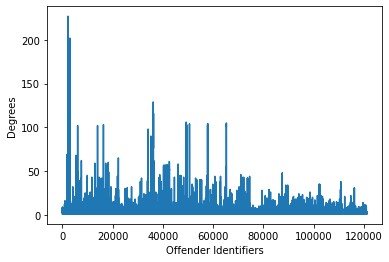

In [185]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    #print(degrees)
    plt.plot(degrees)
    plt.ylabel('Degrees')
    plt.xlabel('Offender Identifiers')
    plt.show()

plot_degree_dist(G)

In [177]:
len(list(G.nodes))

121159

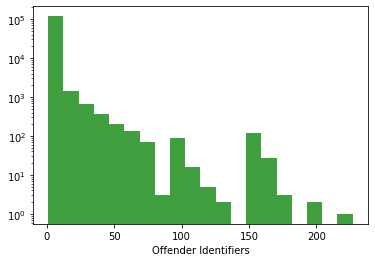

In [197]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    #print(degrees)
    plt.hist(degrees, 20, histtype='stepfilled', facecolor='g', alpha=0.75)
    #plt.plot(degrees)
    plt.yscale('log')
    plt.xlabel('Degrees')
    plt.xlabel('Offender Identifiers')
    plt.show()

plot_degree_dist(G)

In [198]:
[(str(n), G.degree(n)) for n in G.nodes()]

[('434570', 1),
 ('518774', 2),
 ('268119', 1),
 ('414255', 1),
 ('376463', 9),
 ('441260', 5),
 ('434569', 6),
 ('485040', 7),
 ('518300', 7),
 ('531531', 7),
 ('495429', 2),
 ('505949', 2),
 ('516587', 2),
 ('535611', 8),
 ('519300', 2),
 ('428281', 1),
 ('465356', 2),
 ('527177', 1),
 ('582718', 2),
 ('78028', 1),
 ('108593', 1),
 ('498206', 4),
 ('520619', 4),
 ('527482', 4),
 ('534286', 4),
 ('548036', 4),
 ('107142', 2),
 ('235227', 2),
 ('429462', 2),
 ('69042', 1),
 ('286089', 2),
 ('402937', 1),
 ('479651', 1),
 ('29658', 1),
 ('79461', 1),
 ('217893', 1),
 ('239842', 1),
 ('45614', 1),
 ('346538', 1),
 ('563285', 1),
 ('595880', 1),
 ('420455', 1),
 ('456568', 2),
 ('555159', 2),
 ('557424', 2),
 ('559357', 2),
 ('567278', 2),
 ('578686', 6),
 ('373022', 1),
 ('562460', 1),
 ('565905', 2),
 ('568821', 2),
 ('570763', 2),
 ('526129', 1),
 ('542286', 1),
 ('495763', 6),
 ('529805', 1),
 ('579430', 1),
 ('249470', 4),
 ('286624', 2),
 ('320225', 8),
 ('320268', 1),
 ('409409', 1

434570
518774
268119
414255
376463
441260
434569
485040
518300
531531
495429
505949
516587
535611
519300
428281
465356
527177
582718
78028
108593
[('434570', 1), ('518774', 2), ('268119', 1), ('414255', 1), ('376463', 9), ('441260', 5), ('434569', 6), ('485040', 7), ('518300', 7), ('531531', 7), ('495429', 2), ('505949', 2), ('516587', 2), ('535611', 8), ('519300', 2), ('428281', 1), ('465356', 2), ('527177', 1), ('582718', 2), ('78028', 1)]


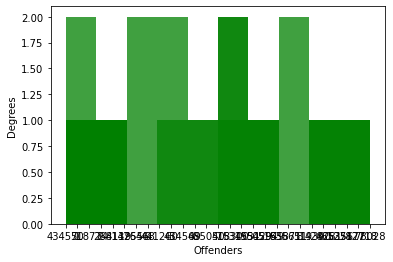

In [215]:
count = 0
lis = []
x = []
y = []
for n in G.nodes():
    count += 1
    print(n)
    if count > 20:
        break
    deg = G.degree(n)
    x.append(n)
    y.append(deg)
    lis.append((n, deg))
print(lis)
def plot_degree_dist(l):
    plt.hist(l, histtype='stepfilled', facecolor='g', alpha=0.75, bins=10)
    plt.ylabel('Degrees')
    plt.xlabel('Offenders')
    plt.show()

plot_degree_dist(lis)

3.13951
8.826451549739566


Text(0, 0.5, 'Probability Density')

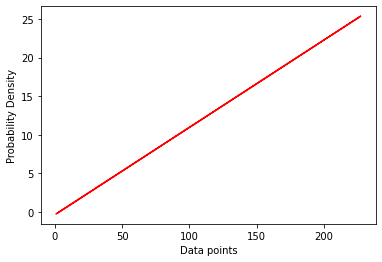

In [222]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Creating a series of data of in range of 1-50.
x = np.linspace(1,50,200)
 
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (x - mean) / sd
    return prob_density

count = 0
x = []
y = []
for n in G.nodes():
    count += 1
    #print(n)
    if count > 100000:
        break
    deg = G.degree(n)
    x.append(n)
    y.append(deg)
    

#Calculate mean and Standard deviation.
mean = np.mean(y)
print(mean)
sd = np.std(y)
print(sd)
 
#Apply function to the data.
pdf = normal_dist(y,mean,sd)
 
#Plotting the Results
plt.plot(y,pdf,color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

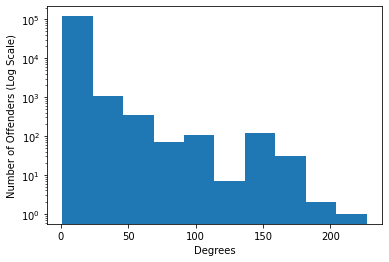

In [227]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.yscale('log')
    plt.ylabel('Number of Offenders (Log Scale)')
    plt.xlabel('Degrees')
    plt.show()

plot_degree_dist(G)

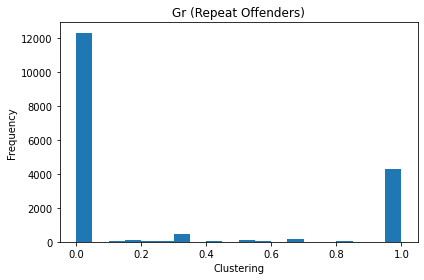

In [264]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx

#gc = Gnr.subgraph(max(nx.connected_components(Gnr)))
lcc = nx.clustering(Gr)

#cmap = plt.get_cmap('autumn')
#norm = plt.Normalize(0, max(lcc.values()))
#node_colors = [cmap(norm(lcc[node])) for node in Gr.nodes]

#fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
#nx.draw_spring(Gr, node_color=node_colors, with_labels=True, ax=ax1)
#nx.drawing.nx_pylab.draw_spring(Gr, node_color=node_colors, with_labels=True, ax=ax1)
#fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

# ax2.hist(lcc.values(), bins=10)
# ax2.set_xlabel('Clustering')
# ax2.set_ylabel('Frequency')

# plt.tight_layout()
# plt.show()

plt.hist(lcc.values(), bins=20)
plt.title('Gr (Repeat Offenders)')
plt.xlabel('Clustering')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [292]:
gnrc = Gnr.subgraph(max(nx.connected_components(Gnr)))
nx.algorithms.centrality.betweenness_centrality(gnrc, normalized = True)

{'268119': 0.0, '414255': 0.0}

In [302]:
grc = Gr.subgraph(max(nx.connected_components(Gr)))
nx.algorithms.centrality.eigenvector_centrality(grc)


{'519300': 0.5000000644180599,
 '518774': 0.707106690085642,
 '434570': 0.5000000644180599}

In [339]:
list_components = list(nx.connected_components(Gr))
max_len = 0
for com in list_components:
    if len(com) > max_len:
        max_len = len(com)
        grc = Gr.subgraph(com)

 
grc_len = len(grc)
grc_centrality = nx.algorithms.centrality.eigenvector_centrality(grc, max_iter=600)

sorted_central = sorted(grc_centrality.items(), key=lambda a:a[1], reverse=True)
list_cen = [v for k,v in grc_centrality.items()]
sorted_central

[('596946', 0.40559696399556316),
 ('610924', 0.4041651805972148),
 ('626681', 0.3698665006941301),
 ('608039', 0.3280263427309019),
 ('593515', 0.2776864943238825),
 ('627701', 0.2453942558641185),
 ('630371', 0.22054909150202273),
 ('591077', 0.2113888754598492),
 ('582830', 0.1843382743308372),
 ('643988', 0.14573895781833915),
 ('632643', 0.11475911097722714),
 ('627921', 0.11181873006107837),
 ('596056', 0.09928584777458789),
 ('605832', 0.09903308518749504),
 ('623782', 0.09810252095796576),
 ('590256', 0.09692454927261042),
 ('635391', 0.09328443893685419),
 ('636382', 0.09328443893685419),
 ('604892', 0.08799452747895095),
 ('609728', 0.08488743465672978),
 ('610898', 0.08398691170863185),
 ('583987', 0.08369043879539242),
 ('598961', 0.08369043879539242),
 ('563283', 0.08369043879539242),
 ('604843', 0.06792437361436954),
 ('612729', 0.05750050781990968),
 ('633944', 0.04566907249657459),
 ('592205', 0.027228216396867237),
 ('610612', 0.027144039503582743),
 ('507801', 0.02649

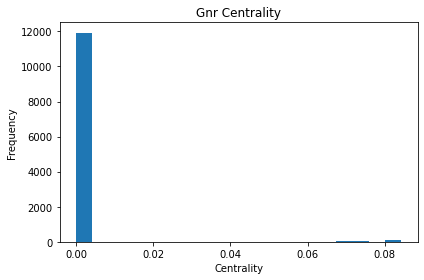

In [318]:
list_components_gnr = list(nx.connected_components(Gnr))
max_len_gnr = 0
for com in list_components_gnr:
    if len(com) > max_len_gnr:
        max_len_gnr = len(com)
        gnrc = Gnr.subgraph(com)

gnrc_len = len(grc)
gnrc_centrality = nx.algorithms.centrality.eigenvector_centrality(gnrc, max_iter=600)

sorted_central = sorted(gnrc_centrality.items(), key=lambda a:a[1], reverse=True)
list_cen = [v for k,v in gnrc_centrality.items()]

plt.hist(list_cen, bins=20)
plt.title('Gnr Centrality')
plt.xlabel('Centrality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

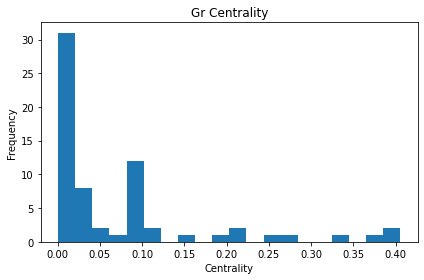

In [321]:
#data[data['OffenderIdentifier'] == 596946]
plt.hist(list_cen, bins=20)
plt.title('Gr Centrality')
plt.xlabel('Centrality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [336]:
data[data['OffenderIdentifier'] == 596946]

,OffenderIdentifier,OffenderGender,CrimeIdentifier,CrimeType1,CrimeType2,CrimeType3,CrimeType4,Municipality,CrimeLocation,NumberYouthOffenders,NumberAdultOffenders,CrimeDate,CrimeYear,OffenderIdentifierStr
1124281,596946,M,974148,21209.0,NaN,NaN,NaN,81017,NaN,0,3,11/15/2004,2004,596946
1124282,596946,M,973760,21203.0,NaN,NaN,NaN,81017,NaN,0,2,10/28/2004,2004,596946
1124283,596946,M,974089,21201.0,NaN,NaN,NaN,81017,NaN,0,2,11/13/2004,2004,596946
1124284,596946,M,976294,8100.0,NaN,NaN,NaN,81017,NaN,0,1,03/08/2005,2005,596946
1124285,596946,M,976293,8100.0,NaN,NaN,NaN,81017,NaN,0,1,03/06/2005,2005,596946
1124286,596946,M,975391,21352.0,NaN,NaN,NaN,81017,NaN,0,2,01/29/2005,2005,596946
1124287,596946,M,975699,21203.0,NaN,NaN,NaN,81017,NaN,0,1,02/14/2005,2005,596946
1124288,596946,M,975954,21209.0,NaN,NaN,NaN,81017,NaN,0,2,02/26/2005,2005,596946
1124289,596946,M,975516,21201.0,NaN,NaN,NaN,81017,NaN,0,2,02/05/2005,2005,596946
1124290,596946,M,975707,8100.0,NaN,NaN,NaN,81017,NaN,0,1,02/09/2005,2005,596946


In [333]:
data[data['OffenderIdentifier'] == 332188]

,OffenderIdentifier,OffenderGender,CrimeIdentifier,CrimeType1,CrimeType2,CrimeType3,CrimeType4,Municipality,CrimeLocation,NumberYouthOffenders,NumberAdultOffenders,CrimeDate,CrimeYear,OffenderIdentifierStr
531925,332188,M,876058,4220.0,NaN,NaN,NaN,23025,0.0,0,42,12/08/2003,2003,332188
531926,332188,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009,332188
531927,332188,M,1331181,1640.0,NaN,NaN,NaN,23027,NaN,0,1,01/26/2009,2009,332188


In [325]:
sorted_central_gnr = sorted(gnrc_centrality.items(), key=lambda a:a[1], reverse=True)
sorted_central_gnr

[('332188', 0.084271189379545),
 ('395620', 0.08415256761729917),
 ('331548', 0.08413204025294847),
 ('209433', 0.08407343034548198),
 ('544851', 0.08406885000775627),
 ('132767', 0.08405720944642317),
 ('489127', 0.08405720944642316),
 ('47053', 0.08405334796517416),
 ('165708', 0.08405334796517416),
 ('124467', 0.08405334796517416),
 ('184697', 0.08405334796517416),
 ('137513', 0.08405334796517416),
 ('163928', 0.08405334796517416),
 ('275494', 0.08405334796517416),
 ('229519', 0.08405334796517416),
 ('214508', 0.08405334796517416),
 ('112365', 0.08405334796517416),
 ('56003', 0.08405334796517416),
 ('169065', 0.08405334796517416),
 ('391183', 0.08405334796517416),
 ('192132', 0.08405334796517416),
 ('313614', 0.08405334796517416),
 ('304950', 0.08405334796517416),
 ('93453', 0.08405334796517416),
 ('103245', 0.08405334796517416),
 ('199104', 0.08405334796517416),
 ('51795', 0.08405334796517416),
 ('307689', 0.08405334796517416),
 ('213208', 0.08405334796517416),
 ('251702', 0.084053

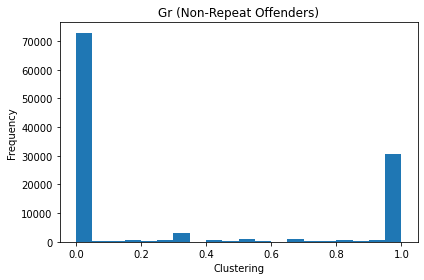

In [263]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx

#gc = Gnr.subgraph(max(nx.connected_components(Gnr)))
lcc = nx.clustering(Gnr)

# cmap = plt.get_cmap('autumn')
# norm = plt.Normalize(0, max(lcc.values()))
# node_colors = [cmap(norm(lcc[node])) for node in Gnr.nodes]

# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
#nx.draw_spring(Gr, node_color=node_colors, with_labels=True, ax=ax1)
#nx.drawing.nx_pylab.draw_spring(Gr)
# fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

# ax2.hist(lcc.values(), bins=10)
# ax2.set_xlabel('Clustering')
# ax2.set_ylabel('Frequency')

# plt.tight_layout()
# plt.show()

plt.hist(lcc.values(), bins=20)
plt.title('Gr (Non-Repeat Offenders)')
plt.xlabel('Clustering')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [238]:
lcc

{'268119': 0,
 '414255': 0,
 '376463': 0.16666666666666666,
 '441260': 0,
 '434569': 0,
 '485040': 0,
 '518300': 0,
 '531531': 0,
 '495429': 1.0,
 '505949': 1.0,
 '516587': 1.0,
 '535611': 0,
 '519300': 0,
 '428281': 0,
 '465356': 0,
 '527177': 0,
 '582718': 0,
 '78028': 0,
 '108593': 0,
 '498206': 1.0,
 '520619': 1.0,
 '527482': 1.0,
 '534286': 1.0,
 '548036': 1.0,
 '107142': 1.0,
 '235227': 1.0,
 '429462': 1.0,
 '286089': 0,
 '402937': 0,
 '479651': 0,
 '29658': 0,
 '79461': 0,
 '217893': 0,
 '239842': 0,
 '45614': 0,
 '346538': 0,
 '563285': 0,
 '595880': 0,
 '420455': 0,
 '456568': 0,
 '567278': 0,
 '578686': 0,
 '373022': 0,
 '562460': 0,
 '565905': 1.0,
 '568821': 1.0,
 '570763': 1.0,
 '526129': 0,
 '542286': 0,
 '495763': 0.06666666666666667,
 '529805': 0,
 '579430': 0,
 '249470': 0,
 '320225': 0.3333333333333333,
 '320268': 0,
 '409409': 0,
 '190112': 1.0,
 '239374': 1.0,
 '306038': 1.0,
 '241760': 0,
 '367111': 0,
 '195856': 0,
 '359861': 0,
 '525587': 0.2,
 '549600': 1.0,
 '5

In [266]:
len(list(Gr.nodes))

17764

In [289]:
import random 

to_pick = []
for i in range(1, 1776):
    to_pick.append(random.randint(1, 17765))

print(len(to_pick))
print(to_pick)
inds_remove = []
for i in range(1, 17765):
    if i not in to_pick:
        inds_remove.append(i)

print(len(inds_remove))

#list(zip(range(1, 17765), list(Gr.nodes)))
Grcopy = Gr.copy()
for i in remove:
    if i in Grcopy:
        Grcopy.remove_node(i)
len(list(Grcopy.nodes()))

1775
[17365, 12781, 2353, 11699, 15520, 16166, 4993, 12656, 15662, 6616, 8457, 17601, 10558, 7018, 3638, 7191, 4643, 3626, 11700, 9435, 521, 9128, 6791, 12221, 7390, 9233, 14301, 748, 6966, 10687, 16591, 12141, 13527, 600, 993, 1536, 7012, 12505, 17686, 15867, 11260, 4846, 17125, 1501, 11158, 13308, 16192, 16740, 2878, 3851, 8340, 13611, 278, 10864, 12234, 1428, 8711, 17262, 10957, 1087, 16383, 16296, 10343, 17502, 459, 2367, 13446, 1945, 11412, 5951, 7613, 8146, 16129, 16379, 17058, 13854, 2799, 2580, 4556, 17661, 10389, 1613, 10084, 6381, 17749, 912, 292, 14920, 8972, 7911, 12500, 8396, 2525, 1215, 11727, 9594, 10401, 11850, 3722, 9527, 1325, 2813, 14818, 412, 13069, 16354, 5672, 1214, 14362, 13103, 12470, 2281, 12273, 10431, 13002, 16370, 4144, 15368, 17166, 2583, 1365, 11722, 14700, 3638, 12157, 16713, 15483, 16209, 13974, 9660, 8605, 2940, 11735, 4029, 8552, 525, 1715, 4434, 697, 17514, 7059, 9290, 5668, 1554, 8437, 15055, 13198, 9448, 942, 6899, 17734, 5377, 5680, 11377, 9574, 90

16079


17764

In [283]:
remove

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 41,
 42,
 43,
 44,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 70,
 73,
 74,
 75,
 76,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 89,
 90,
 91,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 106,
 107,
 109,
 112,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 151,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 183,
 184,
 186,
 187,
 188,
 189,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 200,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 210

In [33]:
#data.nlargest(3,'pop')
data.groupby('OffenderIdentifier') \
.agg(count_offenses=pd.NamedAgg(column='CrimeIdentifier', aggfunc='count')) \
.nlargest(10, 'count_offenses') \
.index \
.tolist()

[300728, 440431, 253577, 120976, 373749, 396148, 189402, 614546, 623487, 7540]

In [51]:
data.groupby('OffenderIdentifier', as_index=False) \
.agg(count_offenses='CrimeIdentifier', aggfunc='count')) \
.nlargest(10, 'count_offenses')

,OffenderIdentifier,count_offenses
218599,300728,456
326019,440431,358
182187,253577,357
82707,120976,350
274924,373749,275
292095,396148,247
133277,189402,220
483740,614546,209
492640,623487,206
5458,7540,196


In [81]:
filter_series = data.OffenderIdentifier.isin(offender_list)
data[filter_series] \
.groupby(['OffenderIdentifier', 'CrimeYear'], as_index=False) \
.agg(AvgAdultOffenders=('NumberAdultOffenders', np.average),
     AvgYouthOffenders=('NumberYouthOffenders', np.average)) \
.sort_values(by=['OffenderIdentifier', 'CrimeYear'], ascending=True)

,OffenderIdentifier,CrimeYear,AvgAdultOffenders,AvgYouthOffenders
0,7540,2004,1.000000,0.000000
1,7540,2005,1.000000,0.000000
2,7540,2006,1.000000,0.000000
3,120976,2003,1.500000,0.000000
4,120976,2005,1.007092,0.000000
5,120976,2006,1.016129,0.000000
6,120976,2007,3.000000,0.000000
7,120976,2008,1.000000,0.000000
8,189402,2003,1.000000,0.000000
9,189402,2004,1.000000,0.000000


ValueError: Unrecognized character n in format string

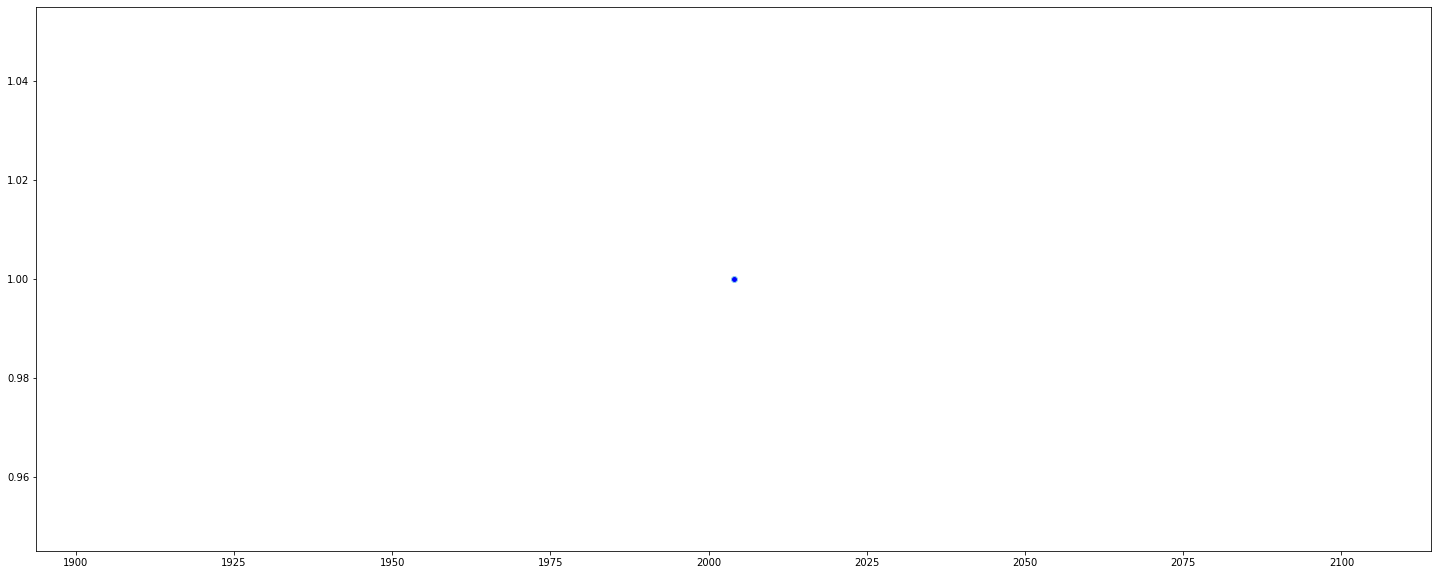

In [74]:
import numpy as np
import matplotlib.pylab as plt
filter_series = data.OffenderIdentifier.isin(offender_list)
new_data = data[filter_series] \
.groupby(['OffenderIdentifier', 'CrimeYear'], as_index=False) \
.agg(AvgAdultOffenders=('NumberAdultOffenders', np.average),
     AvgYouthOffenders=('NumberYouthOffenders', np.average)) \
.sort_values(by=['OffenderIdentifier', 'CrimeYear'], ascending=True)

crimeyear_7540   = new_data.loc[new_data['OffenderIdentifier']==7540  ]['CrimeYear'].tolist()
avg_adult_7540   = new_data.loc[new_data['OffenderIdentifier']==7540  ]['AvgAdultOffenders'].tolist()
crimeyear_623487 = new_data.loc[new_data['OffenderIdentifier']==623487]['CrimeYear'].tolist()
avg_adult_623487 = new_data.loc[new_data['OffenderIdentifier']==623487]['AvgAdultOffenders'].tolist()
crimeyear_614546 = new_data.loc[new_data['OffenderIdentifier']==614546]['CrimeYear'].tolist()
avg_adult_614546 = new_data.loc[new_data['OffenderIdentifier']==614546]['AvgAdultOffenders'].tolist()
crimeyear_189402 = new_data.loc[new_data['OffenderIdentifier']==189402]['CrimeYear'].tolist()
avg_adult_189402 = new_data.loc[new_data['OffenderIdentifier']==189402]['AvgAdultOffenders'].tolist()
crimeyear_396148 = new_data.loc[new_data['OffenderIdentifier']==396148]['CrimeYear'].tolist()
avg_adult_396148 = new_data.loc[new_data['OffenderIdentifier']==396148]['AvgAdultOffenders'].tolist()
crimeyear_373749 = new_data.loc[new_data['OffenderIdentifier']==373749]['CrimeYear'].tolist()
avg_adult_373749 = new_data.loc[new_data['OffenderIdentifier']==373749]['AvgAdultOffenders'].tolist()
crimeyear_120976 = new_data.loc[new_data['OffenderIdentifier']==120976]['CrimeYear'].tolist()
avg_adult_120976 = new_data.loc[new_data['OffenderIdentifier']==120976]['AvgAdultOffenders'].tolist()
crimeyear_253577 = new_data.loc[new_data['OffenderIdentifier']==253577]['CrimeYear'].tolist()
avg_adult_253577 = new_data.loc[new_data['OffenderIdentifier']==253577]['AvgAdultOffenders'].tolist()
crimeyear_440431 = new_data.loc[new_data['OffenderIdentifier']==440431]['CrimeYear'].tolist()
avg_adult_440431 = new_data.loc[new_data['OffenderIdentifier']==440431]['AvgAdultOffenders'].tolist()
crimeyear_300728 = new_data.loc[new_data['OffenderIdentifier']==300728]['CrimeYear'].tolist()
avg_adult_300728 = new_data.loc[new_data['OffenderIdentifier']==300728]['AvgAdultOffenders'].tolist()


list_of_cols = list(zip(
crimeyear_7540  ,
avg_adult_7540  ,
crimeyear_623487,
avg_adult_623487,
crimeyear_614546,
avg_adult_614546,
crimeyear_189402,
avg_adult_189402,
crimeyear_396148,
avg_adult_396148,
crimeyear_373749,
avg_adult_373749,
crimeyear_120976,
avg_adult_120976,
crimeyear_253577,
avg_adult_253577,
crimeyear_440431,
avg_adult_440431,
crimeyear_300728,
avg_adult_300728,
))

df_cols = pd.DataFrame(
    list_of_cols, 
    columns = [
'crimeyear_7540'
,'avg_adult_7540'
,'crimeyear_623487'
,'avg_adult_623487'
,'crimeyear_614546'
,'avg_adult_614546'
,'crimeyear_189402'
,'avg_adult_189402'
,'crimeyear_396148'
,'avg_adult_396148'
,'crimeyear_373749'
,'avg_adult_373749'
,'crimeyear_120976'
,'avg_adult_120976'
,'crimeyear_253577'
,'avg_adult_253577'
,'crimeyear_440431'
,'avg_adult_440431'
,'crimeyear_300728'
,'avg_adult_300728'
    ]
)

plt.plot( 
    'crimeyear_7540', 
    'avg_adult_7540', 
    data=df, 
    marker='o', 
    markerfacecolor='blue', 
    markersize=6, 
    color='skyblue', 
    linewidth=3, 
    label="7540"
)
plt.plot( 
    'x_values', 
    'n1_betweenness_centrality', 
    data=df, 
    marker='o', 
    markerfacecolor='green', 
    markersize=6, 
    color='olive', 
    linewidth=3, 
    label="n1_betweenness_centrality"
)
plt.plot( 
    'x_values', 
    'n1_degree_centrality', 
    data=df, 
    marker='o', 
    markerfacecolor='purple', 
    markersize=6, 
    color='plum', 
    linewidth=3, 
    label="n1_degree_centrality"
)
plt.plot(
    'x_values', 
    'n3_eigenvector_centrality', 
    data=df, 
    marker='o', 
    markerfacecolor='orange', 
    markersize=6, 
    color='yellow', 
    linewidth=3, 
    label="n3_eigenvector_centrality")
plt.plot(
    'x_values', 
    'n3_betweenness_centrality', 
    data=df, 
    marker='o', 
    markerfacecolor='red', 
    markersize=6, 
    color='pink', 
    linewidth=3, 
    label="n3_betweenness_centrality"
)
plt.plot(
    'x_values', 
    'n3_degree_centrality', 
    data=df, 
    marker='o', 
    markerfacecolor='burlywood', 
    markersize=6, 
    color='peachpuff', 
    linewidth=3, 
    label="n3_degree_centrality"
)

plt.legend()
plt.rcParams["figure.figsize"] = (25,10)
plt.legend(fontsize=16)
plt.xlabel('Phases', fontsize=18)
plt.ylabel('Centrality', fontsize=18)
plt.show()

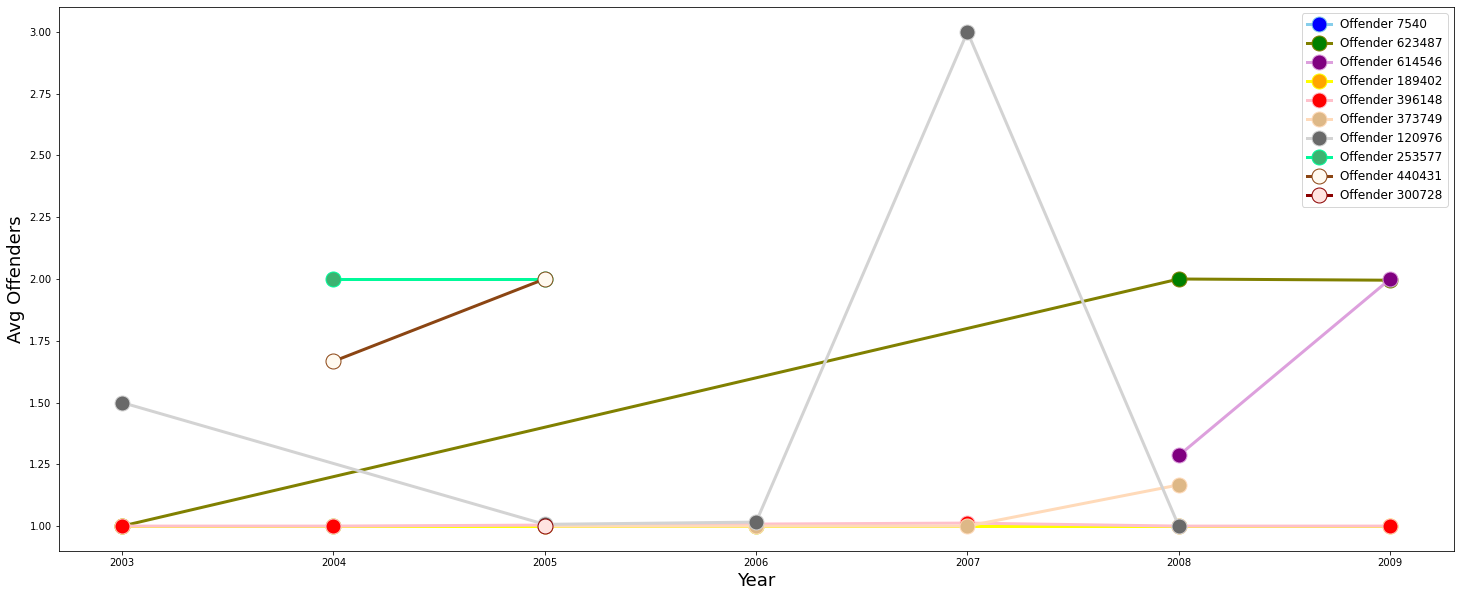

In [88]:
import numpy as np
import matplotlib.pylab as plt
filter_series = data.OffenderIdentifier.isin(offender_list)
new_data = data[filter_series] \
.groupby(['OffenderIdentifier', 'CrimeYear'], as_index=False) \
.agg(AvgAdultOffenders=('NumberAdultOffenders', np.average),
     AvgYouthOffenders=('NumberYouthOffenders', np.average)) \
.sort_values(by=['OffenderIdentifier', 'CrimeYear'], ascending=True)

crimeyear_7540   = new_data.loc[new_data['OffenderIdentifier']==7540  ]['CrimeYear'].tolist()
avg_adult_7540   = new_data.loc[new_data['OffenderIdentifier']==7540  ]['AvgAdultOffenders'].tolist()
crimeyear_623487 = new_data.loc[new_data['OffenderIdentifier']==623487]['CrimeYear'].tolist()
avg_adult_623487 = new_data.loc[new_data['OffenderIdentifier']==623487]['AvgAdultOffenders'].tolist()
crimeyear_614546 = new_data.loc[new_data['OffenderIdentifier']==614546]['CrimeYear'].tolist()
avg_adult_614546 = new_data.loc[new_data['OffenderIdentifier']==614546]['AvgAdultOffenders'].tolist()
crimeyear_189402 = new_data.loc[new_data['OffenderIdentifier']==189402]['CrimeYear'].tolist()
avg_adult_189402 = new_data.loc[new_data['OffenderIdentifier']==189402]['AvgAdultOffenders'].tolist()
crimeyear_396148 = new_data.loc[new_data['OffenderIdentifier']==396148]['CrimeYear'].tolist()
avg_adult_396148 = new_data.loc[new_data['OffenderIdentifier']==396148]['AvgAdultOffenders'].tolist()
crimeyear_373749 = new_data.loc[new_data['OffenderIdentifier']==373749]['CrimeYear'].tolist()
avg_adult_373749 = new_data.loc[new_data['OffenderIdentifier']==373749]['AvgAdultOffenders'].tolist()
crimeyear_120976 = new_data.loc[new_data['OffenderIdentifier']==120976]['CrimeYear'].tolist()
avg_adult_120976 = new_data.loc[new_data['OffenderIdentifier']==120976]['AvgAdultOffenders'].tolist()
crimeyear_253577 = new_data.loc[new_data['OffenderIdentifier']==253577]['CrimeYear'].tolist()
avg_adult_253577 = new_data.loc[new_data['OffenderIdentifier']==253577]['AvgAdultOffenders'].tolist()
crimeyear_440431 = new_data.loc[new_data['OffenderIdentifier']==440431]['CrimeYear'].tolist()
avg_adult_440431 = new_data.loc[new_data['OffenderIdentifier']==440431]['AvgAdultOffenders'].tolist()
crimeyear_300728 = new_data.loc[new_data['OffenderIdentifier']==300728]['CrimeYear'].tolist()
avg_adult_300728 = new_data.loc[new_data['OffenderIdentifier']==300728]['AvgAdultOffenders'].tolist()

list_of_cols = list(zip(
crimeyear_7540  ,
avg_adult_7540  ,
crimeyear_623487,
avg_adult_623487,
crimeyear_614546,
avg_adult_614546,
crimeyear_189402,
avg_adult_189402,
crimeyear_396148,
avg_adult_396148,
crimeyear_373749,
avg_adult_373749,
crimeyear_120976,
avg_adult_120976,
crimeyear_253577,
avg_adult_253577,
crimeyear_440431,
avg_adult_440431,
crimeyear_300728,
avg_adult_300728,
))

df = pd.DataFrame(
    list_of_cols, 
    columns = [
'crimeyear_7540'
,'avg_adult_7540'
,'crimeyear_623487'
,'avg_adult_623487'
,'crimeyear_614546'
,'avg_adult_614546'
,'crimeyear_189402'
,'avg_adult_189402'
,'crimeyear_396148'
,'avg_adult_396148'
,'crimeyear_373749'
,'avg_adult_373749'
,'crimeyear_120976'
,'avg_adult_120976'
,'crimeyear_253577'
,'avg_adult_253577'
,'crimeyear_440431'
,'avg_adult_440431'
,'crimeyear_300728'
,'avg_adult_300728'
    ]
)

plt.plot( 
    crimeyear_7540, 
    avg_adult_7540, 
    marker='o', 
    markerfacecolor='blue', 
    markersize=15, 
    color='skyblue', 
    linewidth=3, 
    label="Offender 7540"
)
plt.plot( 
    crimeyear_623487, 
    avg_adult_623487, 
    marker='o', 
    markerfacecolor='green', 
    markersize=15, 
    color='olive', 
    linewidth=3, 
    label="Offender 623487"
)
plt.plot( 
    crimeyear_614546, 
    avg_adult_614546, 
    marker='o', 
    markerfacecolor='purple', 
    markersize=15, 
    color='plum', 
    linewidth=3, 
    label="Offender 614546"
)
plt.plot(
    crimeyear_189402, 
    avg_adult_189402, 
    marker='o', 
    markerfacecolor='orange', 
    markersize=15, 
    color='yellow', 
    linewidth=3, 
    label="Offender 189402")
plt.plot(
    crimeyear_396148, 
    avg_adult_396148, 
    marker='o', 
    markerfacecolor='red', 
    markersize=15, 
    color='pink', 
    linewidth=3, 
    label="Offender 396148"
)
plt.plot(
    crimeyear_373749, 
    avg_adult_373749, 
    marker='o', 
    markerfacecolor='burlywood', 
    markersize=15, 
    color='peachpuff', 
    linewidth=3, 
    label="Offender 373749"
)

plt.plot( 
    crimeyear_120976, 
    avg_adult_120976, 
    marker='o', 
    markerfacecolor='dimgrey', 
    markersize=15, 
    color='lightgrey', 
    linewidth=3, 
    label="Offender 120976"
)
plt.plot(
    crimeyear_253577, 
    avg_adult_253577, 
    marker='o', 
    markerfacecolor='mediumseagreen', 
    markersize=15, 
    color='mediumspringgreen', 
    linewidth=3, 
    label="Offender 253577")
plt.plot(
    crimeyear_440431, 
    avg_adult_440431, 
    marker='o', 
    markerfacecolor='floralwhite', 
    markersize=15, 
    color='saddlebrown', 
    linewidth=3, 
    label="Offender 440431"
)
plt.plot(
    crimeyear_300728, 
    avg_adult_300728, 
    marker='o', 
    markerfacecolor='mistyrose', 
    markersize=15, 
    color='darkred', 
    linewidth=3, 
    label="Offender 300728"
)

plt.legend()
plt.rcParams["figure.figsize"] = (25,10)
plt.legend(fontsize=12)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Avg Offenders', fontsize=18)
plt.show()

In [77]:
avg_adult_7540

[1.0, 1.0, 1.0]